<a href="https://colab.research.google.com/github/Turdil/1-projeto-html-css-Fabio/blob/main/TesteIBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Análise Comparativa de Ações e Receita: Tesla e GameStop**

In [2]:

# !pip install yfinance

import yfinance as yf

# Baixando os dados das ações da Tesla
tesla = yf.Ticker('TSLA')

# Obtendo o histórico de preços das ações
tesla_stock_data = tesla.history(period="5y")  # 5 anos de dados

# Visualizando os primeiros dados
print(tesla_stock_data.head())


                                Open       High        Low      Close  \
Date                                                                    
2019-10-15 00:00:00-04:00  17.180000  17.333332  16.941334  17.192667   
2019-10-16 00:00:00-04:00  17.159332  17.473333  17.128000  17.316668   
2019-10-17 00:00:00-04:00  17.500000  17.652000  17.344667  17.464666   
2019-10-18 00:00:00-04:00  17.379999  17.520000  17.006666  17.129999   
2019-10-21 00:00:00-04:00  17.222000  17.299999  16.678667  16.900000   

                              Volume  Dividends  Stock Splits  
Date                                                           
2019-10-15 00:00:00-04:00   96492000        0.0           0.0  
2019-10-16 00:00:00-04:00  100261500        0.0           0.0  
2019-10-17 00:00:00-04:00   71539500        0.0           0.0  
2019-10-18 00:00:00-04:00   86247000        0.0           0.0  
2019-10-21 00:00:00-04:00   75304500        0.0           0.0  


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL da página da Tesla no Yahoo Finance (dados de receita)
url = "https://finance.yahoo.com/quote/TSLA/financials?p=TSLA"

# Fazendo a requisição para obter o conteúdo da página
html_data = requests.get(url).text

# Usando BeautifulSoup para analisar o conteúdo HTML
soup = BeautifulSoup(html_data, 'html.parser')

# Encontrando a tabela de receita
tables = soup.find_all('div', {'class': 'D(tbr)'})

# Extraindo a receita anual
revenue_list = []
for table in tables:
    try:
        revenue = table.find_all('div', {'class': 'Ta(c)'})[1].text
        revenue_list.append(revenue)
    except IndexError:
        continue

# Convertendo em DataFrame
revenue_df = pd.DataFrame(revenue_list, columns=['Revenue'])

# Visualizando os dados de receita
print(revenue_df.head())


Empty DataFrame
Columns: [Revenue]
Index: []


In [4]:
# Extraindo dados das ações da GameStop
gamestop = yf.Ticker('GME')

# Obtendo o histórico de preços das ações
gamestop_stock_data = gamestop.history(period="5y")  # 5 anos de dados

# Visualizando os primeiros dados
print(gamestop_stock_data.head())


                             Open    High     Low   Close    Volume  \
Date                                                                  
2019-10-15 00:00:00-04:00  1.4000  1.4775  1.3975  1.4025  25403600   
2019-10-16 00:00:00-04:00  1.3950  1.4775  1.3950  1.4700  15474800   
2019-10-17 00:00:00-04:00  1.4725  1.5125  1.4500  1.5075  14426400   
2019-10-18 00:00:00-04:00  1.5075  1.5125  1.4425  1.4850  12788400   
2019-10-21 00:00:00-04:00  1.4950  1.5400  1.4550  1.4825  14446400   

                           Dividends  Stock Splits  
Date                                                
2019-10-15 00:00:00-04:00        0.0           0.0  
2019-10-16 00:00:00-04:00        0.0           0.0  
2019-10-17 00:00:00-04:00        0.0           0.0  
2019-10-18 00:00:00-04:00        0.0           0.0  
2019-10-21 00:00:00-04:00        0.0           0.0  


In [5]:
# URL da página da GameStop no Yahoo Finance (dados de receita)
url = "https://finance.yahoo.com/quote/GME/financials?p=GME"

# Fazendo a requisição para obter o conteúdo da página
html_data = requests.get(url).text

# Usando BeautifulSoup para analisar o conteúdo HTML
soup = BeautifulSoup(html_data, 'html.parser')

# Encontrando a tabela de receita
tables = soup.find_all('div', {'class': 'D(tbr)'})

# Extraindo a receita anual
revenue_list = []
for table in tables:
    try:
        revenue = table.find_all('div', {'class': 'Ta(c)'})[1].text
        revenue_list.append(revenue)
    except IndexError:
        continue

# Convertendo em DataFrame
revenue_df = pd.DataFrame(revenue_list, columns=['Revenue'])

# Visualizando os dados de receita
print(revenue_df.head())


Empty DataFrame
Columns: [Revenue]
Index: []


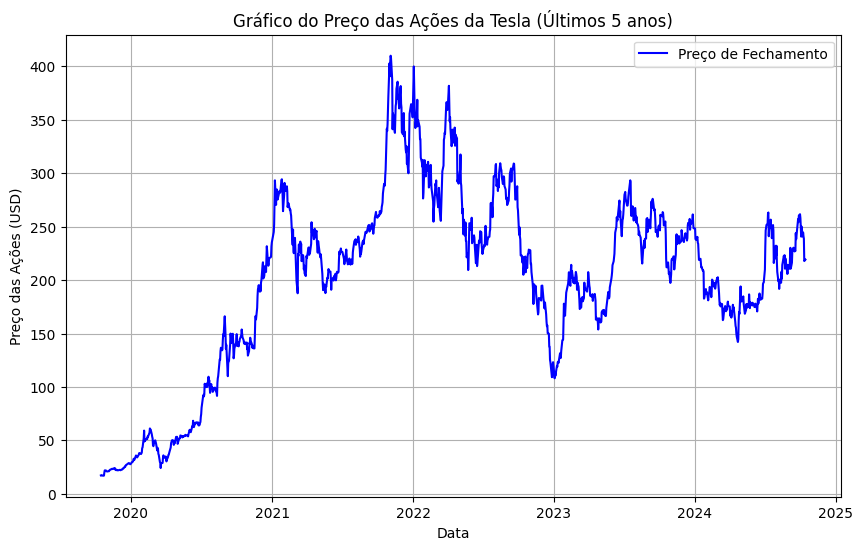

In [7]:
import matplotlib.pyplot as plt

# Função para criar o gráfico de ações
def make_graph(stock_data, title):
    plt.figure(figsize=(10, 6))

    # Plotando o preço das ações (fechamento) ao longo do tempo
    plt.plot(stock_data.index, stock_data['Close'], label='Preço de Fechamento', color='blue')

    # Configurações do gráfico
    plt.title(title)
    plt.xlabel('Data')
    plt.ylabel('Preço das Ações (USD)')
    plt.grid(True)
    plt.legend()

    # Exibindo o gráfico
    plt.show()

# Usando a função para criar o gráfico da Tesla
make_graph(tesla_stock_data, 'Gráfico do Preço das Ações da Tesla (Últimos 5 anos)')


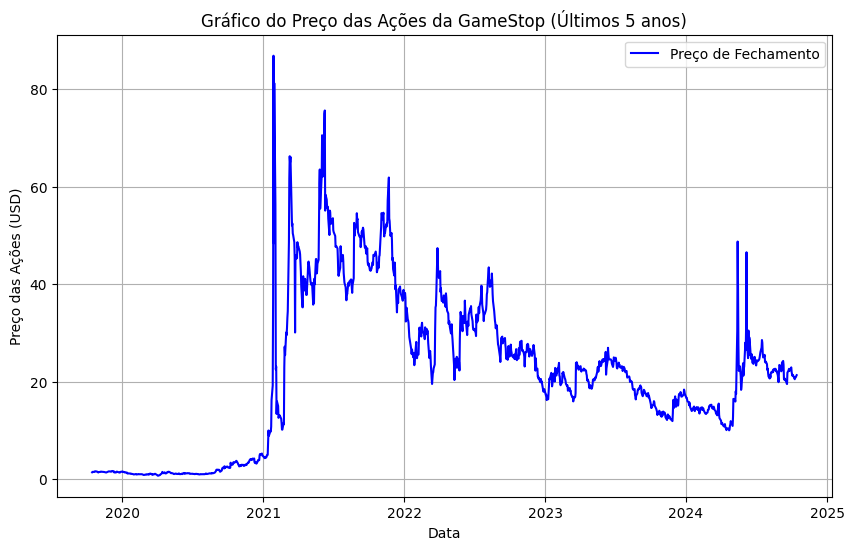

In [8]:
# Usando a mesma função make_graph para criar o gráfico da GameStop
make_graph(gamestop_stock_data, 'Gráfico do Preço das Ações da GameStop (Últimos 5 anos)')
